# Laurenz Tolentino

len:  103


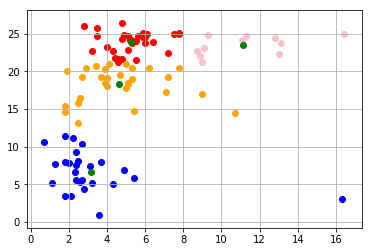

In [2]:
# FILE READING


import csv
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


#practice of reading files
def read_me():
    sampleFile = open('smalldata.csv', 'rb')
    reader = csv.reader(sampleFile)


def usewith():
    clust1 = []
    clusterpoints = []
    with open('smalldata.csv') as smalldata:
        newReader = csv.reader(smalldata)
        for row in newReader:
            if row[0] !=  "\ufeffCLOSEST_DEF":
                clust1.append(row)
    points = np.array(clust1)
    kmeans = KMeans(n_clusters=4, random_state=np.random).fit(points)
    for i in range(len(points)):
        point = points[i]
        label = kmeans.labels_[i]
        clusterpoints.append([float(point[0]), float(point[1]), label])
    for centers in kmeans.cluster_centers_:
        clusterpoints.append([float(centers[0]), float(centers[1]), 99])
    # print(kmeans.labels_)
    # print(kmeans.cluster_centers_)
    return clusterpoints


def colorchoices(x):
    return {
        0: 'red',
        1: 'blue',
        2: 'orange',
        3: 'pink',
        4: 'cyan',
        99: 'green'
    }[x]


def createscatter():
    clusterpoints = usewith()
    fig, ax = plt.subplots()
    print("len: ", len(clusterpoints))
    for i in range(len(clusterpoints)):
        point = clusterpoints[i]
        x = point[0]
        y = point[1]
        z = point[2]
        color = colorchoices(z)
        ax.scatter(x, y, c=color)
    ax.grid(True)
    plt.show()


def testmatplot():
    fig, ax = plt.subplots()
    for color in ['red', 'green', 'blue']:
        n = 100
        x, y = rand(2, n)
        scale = 200.0 * rand(n)
        ax.scatter(x, y, c=color, s=scale, label=color,alpha=0.3, edgecolors='none')
    ax.legend()
    ax.grid(True)
    plt.show()


# Run your crap below
# createscatter()
createscatter()